In [1]:
import numpy as np

fruits = np.load('../data/fruits_300.npy')
fruits.shape

(300, 100, 100)

In [2]:
fruits_2d=fruits.reshape(-1,100*100)
fruits_2d.shape

(300, 10000)

In [3]:
from sklearn.decomposition import PCA
# PCA
pca=PCA(n_components=50)
pca.fit(fruits_2d)

PCA(n_components=50)

In [4]:
# PCA 클래스가 10000개의 피처에 대해 찾은 주성분의 갯수
# 주성분의 성부 PCA.components_
print(pca.components_.shape)

(50, 10000)


In [5]:
import matplotlib.pyplot as plt

def draw_fruits(arr, ratio=1):
    n = len(arr)    # n은 샘플 개수입니다
    # 한 줄에 10개씩 이미지를 그립니다. 샘플 개수를 10으로 나누어 전체 행 개수를 계산합니다. 
    rows = int(np.ceil(n/10))
    # 행이 1개 이면 열 개수는 샘플 개수입니다. 그렇지 않으면 10개입니다.
    cols = n if rows < 2 else 10
    fig, axs = plt.subplots(rows, cols, 
                            figsize=(cols*ratio, rows*ratio), squeeze=False)
    for i in range(rows):
        for j in range(cols):
            if i*10 + j < n:    # n 개까지만 그립니다.
                axs[i, j].imshow(arr[i*10 + j], cmap='gray_r')
            axs[i, j].axis('off')
    plt.show()


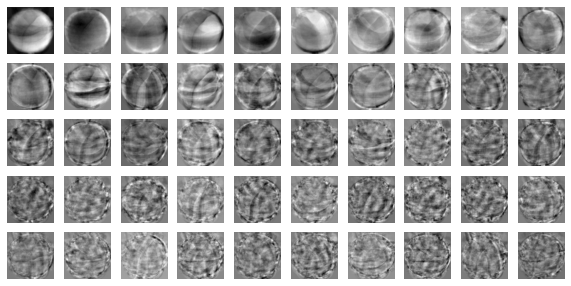

In [7]:
draw_fruits(pca.components_.reshape(-1,100,100))
# 원본데이터에서 찾은 주성분 중 가장 분산이 큰 주성분을 순서대로 나타낸 것
# 피처의 어떤 특징을 찾아낸 것과 같음

In [12]:
# 특징(주성분)을 찾았으므로 원본데이터를 주성분에 투영(매핑)
# 특성의 개수를 50개만큼으로 줄임
print(fruits_2d.shape)
fruits_pca=pca.transform(fruits_2d)
print(fruits_pca.shape)

(300, 10000)
(300, 50)


### 원본데이터로 재구성이 가능한가???
- 어느정도 손실이 발생할 수 밖에 없으니 최대한 특성을 보존(분산이 큰 방향)하면서
    - 데이터를 투영했기 때문에 상당부분 재구성할 수 있다

- PCA.inverse_transform(축소된데이터)로 재구성 가능

In [14]:
# 원본데이터로 재구성하는 함수
fruits_inverse=pca.inverse_transform(fruits_pca)
print(fruits_inverse.shape)

(300, 10000)


In [15]:
fruits_reconstruct = fruits_inverse.reshape(-1,100,100)

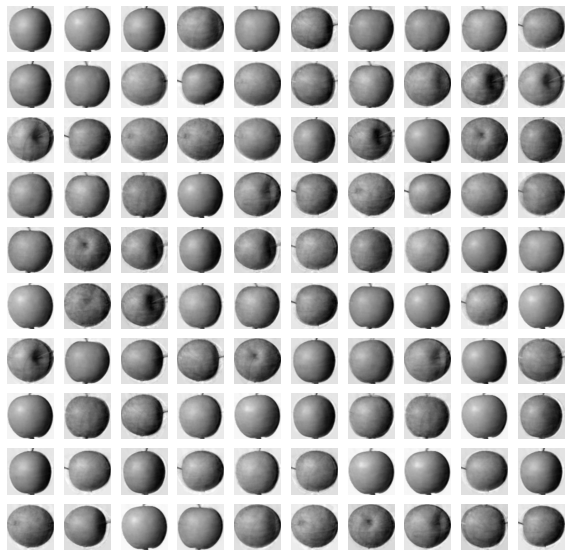

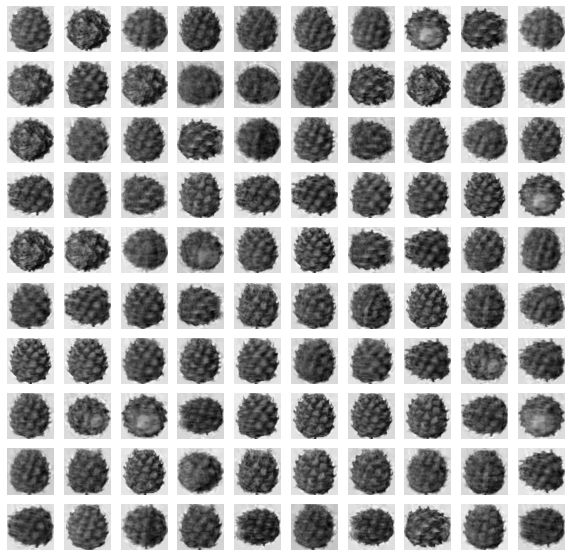

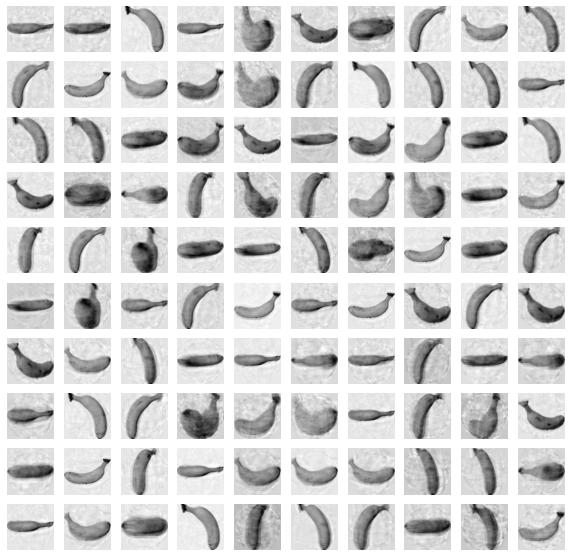

In [16]:
for start in [0, 100, 200]:
    draw_fruits(fruits_reconstruct[start:start+100])
    print("\n")
# 손실된 데이터가 존재해 품질은 떨어지지만 거의 유사하게 복원함

### 설명된 분산
- 주성분이 원데이터의 분산을 얼마나 잘 나타내는지 기록한 값
- explained_variance_ratio_ 속성에 기록되어 있음

In [17]:
pca.explained_variance_ratio_

array([0.42357017, 0.09941755, 0.06577863, 0.04031172, 0.03416875,
       0.03281329, 0.02573267, 0.02054963, 0.01372276, 0.01342773,
       0.01152146, 0.00944596, 0.00878232, 0.00846697, 0.00693049,
       0.00645188, 0.00578896, 0.00511203, 0.00486382, 0.00480347,
       0.00447835, 0.00437317, 0.0040804 , 0.00389475, 0.00372444,
       0.00359273, 0.00331461, 0.00317782, 0.00304308, 0.00303728,
       0.002889  , 0.00275787, 0.00264905, 0.00255909, 0.00251942,
       0.00247386, 0.00239455, 0.00231011, 0.00222059, 0.00216007,
       0.00213299, 0.0019604 , 0.00192103, 0.00189728, 0.00184082,
       0.00180516, 0.00172411, 0.00168047, 0.00162745, 0.001605  ])

In [18]:
# 모든 주성분의 설명된 분산을 다 더하면 총 분산의 비율을 얻을 수 있음
print(np.sum(pca.explained_variance_ratio_))
# 92.2%d의 분산을 설명가능함

0.9215052095165694


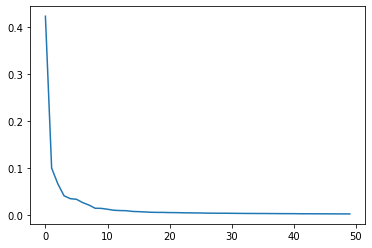

In [19]:
plt.plot(pca.explained_variance_ratio_)

- 처음 10정도의 주성문이 모든 분산으로 표현하고 있음
    - 나머지 주성분이 설명하고 있는 분산은 비교적 적다

### 다른 알고리즘과 함께 사용

In [28]:
target=np.array([0]*100+[1]*100+[2]*100)

In [29]:
# 분류 지도 학습
from sklearn.linear_model import LogisticRegression
lr=LogisticRegression()

In [30]:
from sklearn.model_selection import cross_validate
scores=cross_validate(lr,fruits_2d,target)

In [31]:
# 차원이 많아 과대적합이 일어났을 가능성 높음 99.7%
print(np.mean(scores['test_score']))
# 소요시간 0.7초
print(np.mean(scores['fit_time']))

0.9966666666666667
0.7128541946411133


In [32]:
# 차원 축소한 PCA 데이터를 활용 모델 성능 및 훈련시간 확인
scores=cross_validate(lr,fruits_pca,target)

In [33]:
# 차원이 줄어들었지만 정확성이 올라감
print(np.mean(scores['test_score']))
# 소요시간 0.02초
print(np.mean(scores['fit_time']))

# 이미지의 경우에는 차원축소가 성능을 높일 수 있는 하나의 방법임
# 수행시간은 훨씬 빨라짐

1.0
0.027064418792724608


## PCA로 훈련데이터의 차원을 축소
- 저장 공간을 절약
- 머신러닝의 훈련속도 축소, 성능 향상
- 단, 데이터를 손실하기 때문에 모든 데이터에서 성능향상이 나타나는 것은 아님.(차원이 많아야 함)
    - 차원이 너무 많은 이미지나, 텍스트 처리에서 성능향상이 뛰어남